In [ ]:
# Mount drive to access stored data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the data path to where the datasets are stored
models_path = '/content/drive/My Drive/Difficult Words Data/Compiled Models/'

# Set the data path to where the datasets are stored
dataset_path = '/content/drive/My Drive/Difficult Words Data/DHH Children Data/'

In [ ]:
import pandas as pd

# Load data from the Excel file
data = pd.read_excel(dataset_path + 'complete_data.xlsx')

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target variable (y)
X = data.drop(columns=['overall_label', 'words'])  # Features (excluding 'overall_label' and 'words' columns)
y = data['overall_label']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter specifies the fraction of data to be used for testing (in this case, 20%).
# The 'random_state' parameter ensures reproducibility of the split.

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 7)
X_test shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)


In [ ]:
# Import models
import joblib

# Load the models
DecisionTree = joblib.load(models_path + 'decisionTree_child_model.pkl')
MLP = joblib.load(models_path + 'mlp_child_model.pkl')

In [ ]:
# Get predictions
predictions_positive = MLP.predict(X_test)
predictions_negative = DecisionTree.predict(X_test)
predictions_positive = (predictions_positive > 0.5)
print("mlp shape:", predictions_positive.shape)
print("decision shape:", predictions_negative.shape)

7/7 [==============================] - 0s 2ms/step
mlp shape: (200, 1)
decision shape: (200,)


In [ ]:
import numpy as np

# Combine Predictions
combined_predictions = []

for i in range(len(predictions_positive)):
    if (predictions_positive[i] == 0) and (predictions_negative[i] == 1):
        combined_predictions.append(predictions_negative[i])
    elif (predictions_positive[i] == 1) and (predictions_negative[i] == 0):
        combined_predictions.append(predictions_positive[i, 0] == 1)
    else:
      combined_predictions.append(predictions_negative[i])

combined_predictions = np.array(combined_predictions)

print("combined shape:", combined_predictions.shape)

combined shape: (200,)


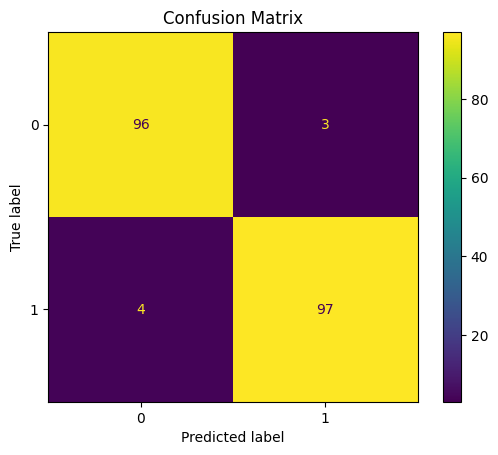

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, combined_predictions)


# Plot the confusion matrix as a heatmap
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']).plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Check the accuracy of the model
accuracy = accuracy_score(y_test, combined_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.965
